In [1]:
import pandas as pd
import numpy as np


#Local PY files
from cleaning_functions import *
from random_lumberjacks.src.random_lumberjacks.model.model_classes import *
from random_lumberjacks.src.random_lumberjacks.visualization.visualization_functions import *

/home/corey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Imports the dataframes
dffo = pd.read_csv("data/submission_format.csv")
dftr = pd.read_csv("data/training_set_features.csv")
dfte = pd.read_csv("data/test_set_features.csv")
dfla = pd.read_csv("data/training_set_labels.csv")

df = pd.merge(dftr, dfla, on="respondent_id")
df = df.set_index("respondent_id")

In [3]:
impute_dict = OrderedDict([("household_adults", [np.nan, "median", None]),
                               ("household_children", [np.nan, "median", None]),
                               ])
df, imputes = fit_clean_data(df, impute_dict)

In [6]:
df.to_pickle("df.csv")

In [13]:

full_value_counts(df, "rent_or_own")

There are 3 unique values with 2042 nan values making up 7.6%
18736-Own --70.15%
5929-Rent --22.20%


In [ ]:
"behavioral_touch_face" "behavioral_antiviral_meds" "behavioral_wash_hands" "rent_or_own"

There are 4 unique values with 0 nan values making up 0.0%
13560-Employed --50.77%
10231-Not in Labor Force --38.31%
1463-unknown --5.48%
1453-Unemployed --5.44%


In [61]:
df[df["household_children"]=="unknown"]["household_adults"].unique()

array(['unknown'], dtype=object)

ValueError: could not convert string to float: '55 - 64 Years'

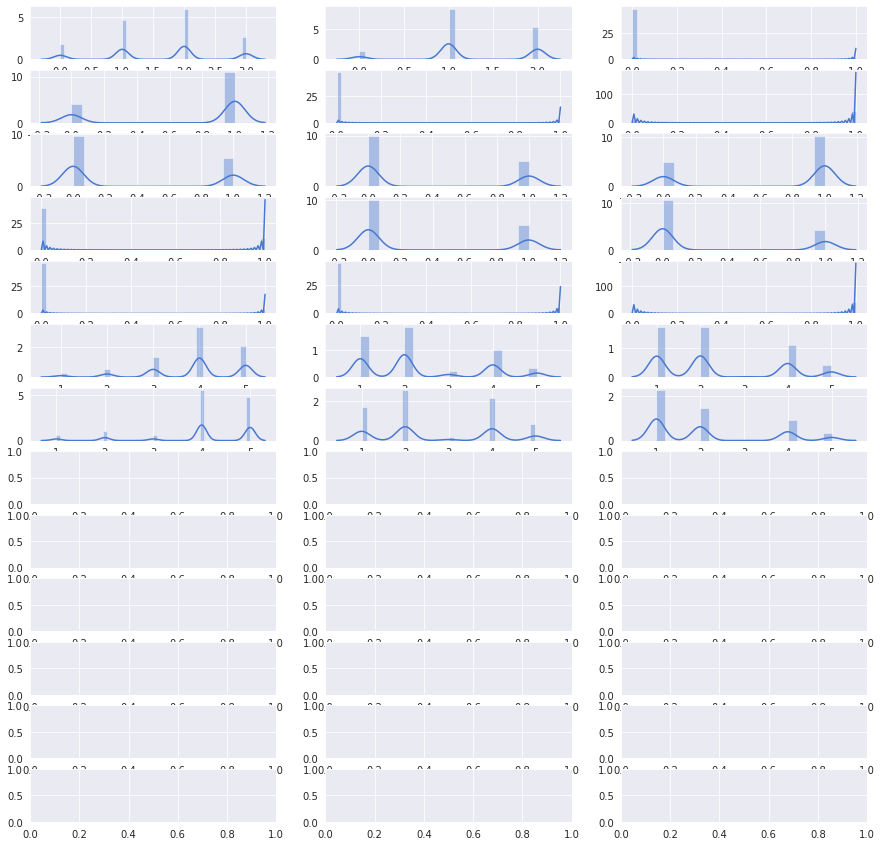

In [37]:
graphs= Multiplot(df, 3)
graphs.sb_multiplot(sns.distplot)

In [46]:
sns.pairplot(df[['column','column','column','column']],hue = 'column')

KeyError: "None of [Index(['column', 'column', 'column', 'column'], dtype='object')] are in the [columns]"

respondent_id
0        55_to_64 Years
1        35_to_44 Years
2        18_to_34 Years
3               Over_65
4        45_to_54 Years
              ...      
26702           Over_65
26703    18_to_34 Years
26704    55_to_64 Years
26705    18_to_34 Years
26706           Over_65
Name: age_group, Length: 26707, dtype: object

In [44]:


df["age_group"].unique()
age_dict {}

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [ ]:
df = get_imputer_objs(df, impute_dict, imputes)

In [23]:
#Creating column selection dictionaries for the data from lists of column names.

#Lists to go in the dictionaries.

reg_dummies = []
target_col1 = "h1n1_vaccine"
target_col2 = "seasonal_vaccine"
target_cols = [target_col1, target_col2]
untr = ['household_adults', 'household_children',]
nom = df.columns.drop(pd.Index([*untr, *target_cols])).to_numpy().tolist()
# polyc = [*nom, *pay_dummies, "PAY_0"]
#The dicts that come into the arguments.

categorical = {
    "nominal_features":nom,
}

continuous = {"untransformed":untr}
polynomial = {"method":"eliminate", "columns":[]}

In [14]:
nom[0].

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation',
 'h1n1_vaccine',
 'seasonal_vaccine']

In [36]:
data = DataPreprocessor(df, target_col, categorical, continuous, polynomial, True, True,random_state=124)
data.data_preprocessing(balance_class=False, scale_type=False, poly_degree=False)
data.get_df()

Creating Dummies
Skipping polynomial features
Skipping class imbalance functions
No scaling specified
Skipping scaling


,household_adults,household_children,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,behavioral_antiviral_meds_1.0,behavioral_avoidance_1.0,behavioral_face_mask_1.0,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
358,1.0,3.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20097,1.0,0.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24982,1.0,0.0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
12299,1.0,0.0,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
8759,0.0,0.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10407,0.0,1.0,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
7443,1.0,0.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16022,1.0,0.0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


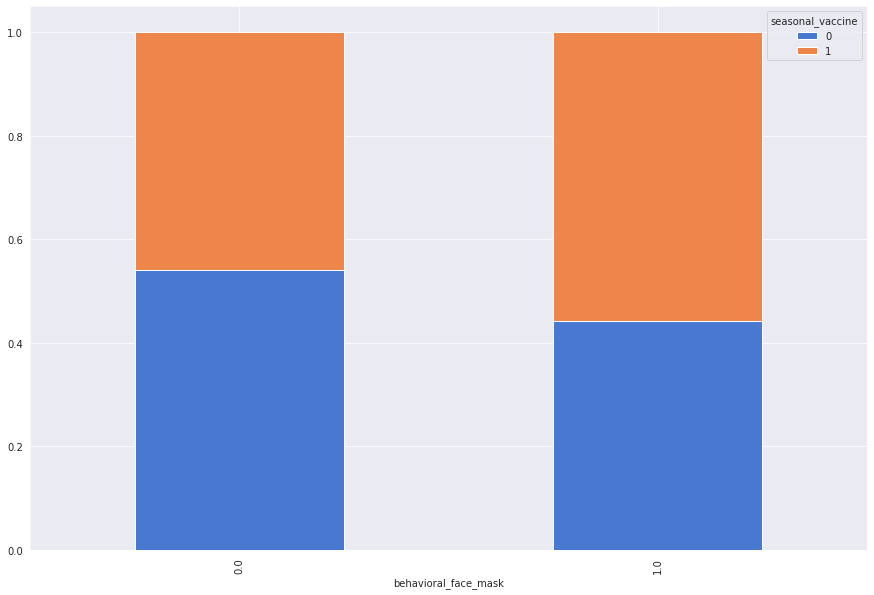

In [32]:
plot_stacked_proportion(df, "behavioral_face_mask", target_col, 1)